#Paquetes necesarios

Podremos hacer uso del mismo *environment* de la primera práctica, aunque en ocasiones pedirá instalar Pillow

In [ ]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

0.396484375 6
0.4296875 12
0.3984375 15
0.390625 20
0.392578125 21
0.388671875 88
0.4140625 100


(0.0, 512.0)

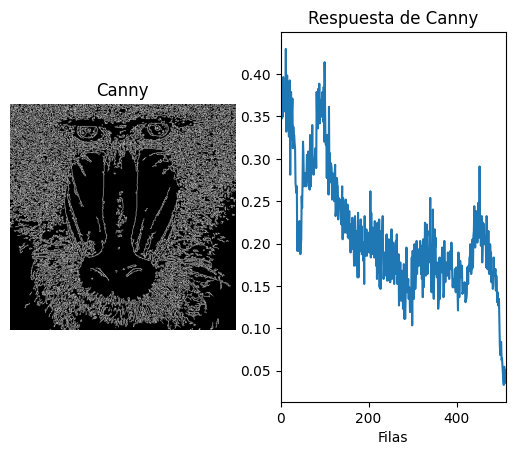

In [ ]:
#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de columnas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
rows = row_counts[:, 0] / (255 * canny.shape[1])
#print(row_counts) np.ndarray.flatten(row_counts)
for i in range(0, len(row_counts), 1):
    if(rows[i] >= max(rows)*0.9):
        print(rows[i], i)
    #print(row_counts[i])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las filas
plt.xlim([0, canny.shape[0]])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

0.3146484375
0.349609375 288
[0.05078125 0.078125   0.09765625 0.07421875 0.08398438 0.06445312
 0.0703125  0.07226562 0.09375    0.10351562 0.08203125 0.09765625
 0.08203125 0.0703125  0.0703125  0.109375   0.08984375 0.078125
 0.09570312 0.09570312 0.09570312 0.09375    0.125      0.1328125
 0.1171875  0.1171875  0.125      0.1015625  0.109375   0.109375
 0.1171875  0.11523438 0.109375   0.12695312 0.1171875  0.14453125
 0.1328125  0.1015625  0.10742188 0.08984375 0.09375    0.11132812
 0.1015625  0.11328125 0.11132812 0.08203125 0.09960938 0.09179688
 0.09570312 0.07617188 0.09570312 0.15234375 0.140625   0.125
 0.14257812 0.15429688 0.15039062 0.1484375  0.16601562 0.17382812
 0.18359375 0.18164062 0.1796875  0.22460938 0.21679688 0.1953125
 0.16992188 0.21679688 0.20703125 0.18554688 0.19921875 0.22070312
 0.1875     0.16210938 0.17382812 0.21679688 0.20117188 0.18164062
 0.19140625 0.20117188 0.18945312 0.15234375 0.1875     0.21484375
 0.20117188 0.18945312 0.17578125 0.20703125

(0.0, 512.0)

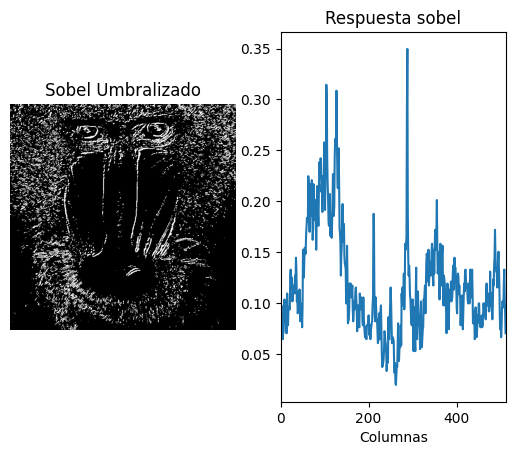

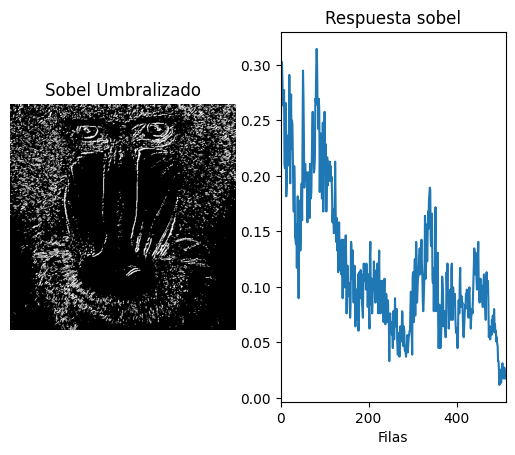

In [ ]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

#Para más tipografías, usar PIL
img = cv2.imread('mandril.jpg')

#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

# Mostrar el tipo de dato de los valores en la imagen soble, además de valores máximo y mínimo
#print(f"Tipo de datos, valor mínimo y máximo en sobel: {sobel.dtype}, {np.min(sobel)}, {np.max(sobel)}")

# Conversión a byte con openCV
sobel8 = cv2.convertScaleAbs(sobel)
# Mostrar el tipo de dato de los valores en la imagen soble, además de valores máximo y mínimo
#print(f"Tipo de datos, valor mínimo y máximo en sobel8: {sobel8.dtype}, {np.min(sobel8)}, {np.max(sobel8)}")

#Define valor umbral
valorUmbral = 130 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
_, imagenUmbralizada = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
#plt.imshow(imagenUmbralizada, cmap='gray')
#plt.show()

col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * imagenUmbralizada.shape[0])

#for i in range(0, len(col_counts[0]), 1):
    #if(cols[i] >= max(cols[i])*0.9):
        #print(cols[i], i)
    #print(col_counts[i])
print(max(cols)*0.9)

for i, value in enumerate(cols):
    if(value >= max(cols)*0.9):
        print(value, i)
print(cols)

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel Umbralizado")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta sobel")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, imagenUmbralizada.shape[1]])

#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por fila
row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de columnas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
rows = row_counts[:, 0] / (255 * imagenUmbralizada.shape[1])
#print(row_counts) np.ndarray.flatten(row_counts)
print(max(rows)*0.9)
for i in range(0, len(row_counts), 1):
    if(rows[i] >= max(rows)*0.9):
        print(rows[i], i)
    #print(row_counts[i])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel Umbralizado")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta sobel")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las filas
plt.xlim([0, imagenUmbralizada.shape[0]])


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [ ]:
# sobel y canny en movimiento/bucle

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [ ]:
# Detector de umbral de cierto movimiento para alarmar de okupas